## Initial Exploration of the Raw Dataset

This dataset comes from https://data.giss.nasa.gov/gistemp/. Dataset is global-mean monthly temperature anomaly from 1880 to present day, computed as deviations from the corresponding 1951 - 1980 means.

In [6]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
# read in data

# define path to dataset
path = os.path.join(os.getcwd(), os.pardir, "data", "raw", "global_mean_monthly_temps.csv")
print(path)

C:\Users\sophi\python_data_science_projects\climate_repo\notebooks\..\data\raw\global_mean_monthly_temps.csv


In [8]:
# read in as csv and assign to variable
df = pd.read_csv(path, skiprows = 1)

In [9]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17,-.16,***,***,-.11,-.16,-.19
1,1881,-0.19,-0.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07,-.08,-.09,-.16,.05,-.07,-.18
2,1882,0.17,0.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35,-.11,-.08,.08,-.09,-.15,-.18
3,1883,-0.29,-0.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10,-.17,-.19,-.33,-.15,-.09,-.18
4,1884,-0.12,-0.07,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.33,-.30,-.28,-.26,-.10,-.36,-.30,-.28


In [10]:
df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
140,2020,1.17,1.24,1.17,1.13,1.01,.91,.89,.87,.98,.87,1.10,.80,1.01,1.04,1.17,1.10,.89,.98
141,2021,0.81,0.64,.88,.75,.78,.84,.92,.82,.92,.99,.94,.86,.85,.84,.75,.81,.86,.95
142,2022,0.91,0.89,1.05,.83,.84,.92,.94,.95,.89,.96,.73,.80,.89,.90,.89,.91,.94,.86
143,2023,0.87,0.97,1.20,1.00,.93,1.08,1.19,1.19,1.48,1.34,1.42,1.35,1.17,1.12,.88,1.04,1.15,1.41
144,2024,1.22,1.44,***,***,***,***,***,***,***,***,***,***,***,***,1.34,***,***,***


In [11]:
# separate seasonal and month columns into own datasets

df_main = df[df.columns[:-6]]
df_seasonal = df.iloc[:,[0,-6,-5,-4,-3,-2,-1]]


In [12]:
# Pivot the main dataframe into time-series format

# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df_main, id_vars='Year', var_name='Month', value_name='Value')

# Combine 'Year' and 'Month' columns to create a 'year-month' column
df_melted['Year-Month'] = df_melted['Year'].astype(str) + '-' + df_melted['Month']

# Convert 'Year-Month' column to datetime
df_melted['Year-Month'] = pd.to_datetime(df_melted['Year-Month'], format='%Y-%b')

# Drop unnecessary columns
df_pivoted = df_melted[['Year-Month', 'Value']]

# Replace non-numeric values with NaN
copied_col = df_pivoted['Value'].copy()

# Use .loc for both operations to avoid SettingWithCopyWarning
df_pivoted = df_pivoted.drop('Value', axis=1)
df_pivoted.loc[:, 'Value'] = copied_col.apply(pd.to_numeric, errors='coerce')

# Sort the DataFrame by 'Year-Month'
df_pivoted = df_pivoted.sort_values('Year-Month')

# Display the pivoted DataFrame
df_pivoted

,Year-Month,Value
0,1880-01-01,-0.17
145,1880-02-01,-0.24
290,1880-03-01,-0.08
435,1880-04-01,-0.16
580,1880-05-01,-0.09
...,...,...
1159,2024-08-01,NaN
1304,2024-09-01,NaN
1449,2024-10-01,NaN
1594,2024-11-01,NaN


In [13]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1740 entries, 0 to 1739
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  1740 non-null   datetime64[ns]
 1   Value       1730 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.8 KB


In [14]:
# Remove the nan values at the end of the time series (these haven't been filled in yet for the year ahead)

df_pivoted.dropna(inplace = True)

In [15]:
df_pivoted

,Year-Month,Value
0,1880-01-01,-0.17
145,1880-02-01,-0.24
290,1880-03-01,-0.08
435,1880-04-01,-0.16
580,1880-05-01,-0.09
...,...,...
1448,2023-10-01,1.34
1593,2023-11-01,1.42
1738,2023-12-01,1.35
144,2024-01-01,1.22


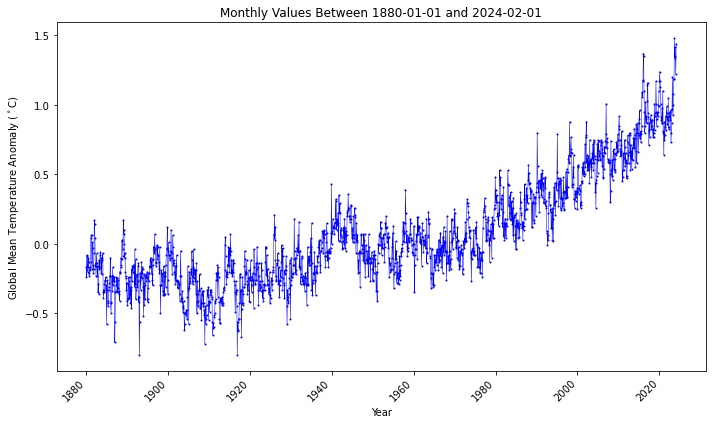

In [16]:
# plot the overall time series

plt.figure(figsize=(10, 6))
plt.plot(df_pivoted['Year-Month'].values, df_pivoted['Value'].values, marker='o', markersize = 1, linewidth = 0.5, color='b')
plt.title(f"Monthly Values Between {df_pivoted['Year-Month'][0].strftime('%Y-%m-%d')} and {df_pivoted['Year-Month'].iloc[-1].strftime('%Y-%m-%d')}")
plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly ($^\circ$C)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

The columns labelled ‘DJF’, ‘MAM’, ‘JJA’, and ‘SON’ contain seasonal averages (means). For example, the ‘MAM’ column contains the average of the March, April, and May columns for each year:

In [17]:
df_seasonal

,Year,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-.16,***,***,-.11,-.16,-.19
1,1881,-.08,-.09,-.16,.05,-.07,-.18
2,1882,-.11,-.08,.08,-.09,-.15,-.18
3,1883,-.17,-.19,-.33,-.15,-.09,-.18
4,1884,-.28,-.26,-.10,-.36,-.30,-.28
...,...,...,...,...,...,...,...
140,2020,1.01,1.04,1.17,1.10,.89,.98
141,2021,.85,.84,.75,.81,.86,.95
142,2022,.89,.90,.89,.91,.94,.86
143,2023,1.17,1.12,.88,1.04,1.15,1.41


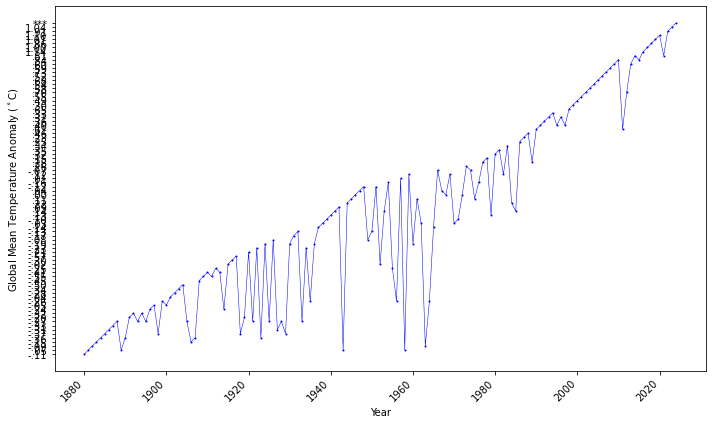

In [18]:
# Plot a separate line chart for each season, using average temperature anomaly for that season on the vertical axis
# and time (from 1880 to the latest year available) on the horizontal axis

plt.figure(figsize=(10, 6))
plt.plot(df_seasonal['Year'].values, df_seasonal['MAM'].values, marker='o', markersize = 1, linewidth = 0.5, color='b')
#plt.title(f"Monthly Values Between {df_pivoted['Year-Month'][0].strftime('%Y-%m-%d')} and {df_pivoted['Year-Month'].iloc[-1].strftime('%Y-%m-%d')}")
plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly ($^\circ$C)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

## Seasonal Plots

In [22]:
df_main

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.17,-0.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17
1,1881,-0.19,-0.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07
2,1882,0.17,0.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35
3,1883,-0.29,-0.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10
4,1884,-0.12,-0.07,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.33,-.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.17,1.24,1.17,1.13,1.01,.91,.89,.87,.98,.87,1.10,.80
141,2021,0.81,0.64,.88,.75,.78,.84,.92,.82,.92,.99,.94,.86
142,2022,0.91,0.89,1.05,.83,.84,.92,.94,.95,.89,.96,.73,.80
143,2023,0.87,0.97,1.20,1.00,.93,1.08,1.19,1.19,1.48,1.34,1.42,1.35


In [20]:
df_main["Year"]

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
140    2020
141    2021
142    2022
143    2023
144    2024
Name: Year, Length: 145, dtype: int64